In [2]:
# Reference: https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/

# import the necessary packages
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
from os import listdir
from os.path import isfile, join

In [233]:
# Initiate SIFT detector
orb = cv2.ORB_create() 

mypath = ".\images\Database"
labels = [f for f in listdir(mypath) if isfile(join(mypath, f))]

database = []
for label in labels:
    img = cv2.imread('.\images\Database\\' + label,1)
    img = cv2.resize(img, (300, 300))
    kp, des = orb.detectAndCompute(img,None)
    hist = cv2.calcHist([img], [0, 1, 2], None, [16, 16, 16], [0, 256, 0, 256, 0, 256])
    database.append([hist,des,img])

labels = [label[:-4] for label in labels]
print(labels)

['Alleve', 'Bayer_Aspirin', 'Cystex', 'Wallgreen_Aspirin_325', 'Wallgreen_Aspirin_81']


In [234]:
def matching(img, database):
    img = cv2.resize(img, (300, 300))
    kp, des = orb.detectAndCompute(img,None)
    hist = cv2.calcHist([img], [0, 1, 2], None, [16, 16, 16], [0, 256, 0, 256, 0, 256])
    score1 = []
    score2 = []
    score3 = []
    for data in database:
        hist_base = data[0]
        des_base = data[1]
        img_base = data[2]
        # Comparing SIFT features
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(des, des_base)
        similar_regions = [i for i in matches if i.distance < 70]
        if len(matches) == 0:
            score1 = 0
        score1.append(len(similar_regions) / len(matches))
        
        # Comparing Color Histogram
#         score2.append(np.linalg.norm(hist-hist_base))
        score2.append(cv2.compareHist(hist, hist_base, cv2.HISTCMP_INTERSECT))
        
#     score2 = 1-(np.array(score2)/np.linalg.norm(score2))
    score2 = (np.array(score2)-np.mean(score2))/np.std(score2)
    score = list(np.array(score1) + score2)
    print(labels)
    print(score1)
    print(score2)
    print(score)
    return labels[score.index(max(score))]

[INFO] loading model...
[INFO] computing object detections...
[INFO] bottle: 99.63%
['Alleve', 'Bayer_Aspirin', 'Cystex', 'Wallgreen_Aspirin_325', 'Wallgreen_Aspirin_81']
[0.5540540540540541, 0.7205882352941176, 0.631578947368421, 0.6976744186046512, 0.6666666666666666]
[ 0.49326603 -0.15595435  1.62608633 -1.26519878 -0.69819923]
[1.0473200832775427, 0.5646338902916856, 2.2576652755135798, -0.5675243606176471, -0.031532566477251556]
Cystex


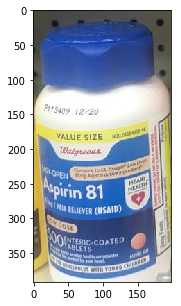

[INFO] bottle: 99.54%
['Alleve', 'Bayer_Aspirin', 'Cystex', 'Wallgreen_Aspirin_325', 'Wallgreen_Aspirin_81']
[0.18439716312056736, 0.5984848484848485, 0.6592592592592592, 0.4859154929577465, 0.5955882352941176]
[-1.07016837  0.99362508 -0.56351526  1.40286397 -0.76280542]
[-0.8857712041931727, 1.5921099277487247, 0.09574400326003363, 1.8887794600788945, -0.16721718777794048]
Wallgreen_Aspirin_325


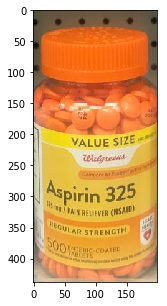

[INFO] bottle: 98.43%
['Alleve', 'Bayer_Aspirin', 'Cystex', 'Wallgreen_Aspirin_325', 'Wallgreen_Aspirin_81']
[0.5205479452054794, 0.8588957055214724, 0.7426470588235294, 0.6527777777777778, 0.6639344262295082]
[-0.65234269  1.96548785 -0.19567147 -0.40277931 -0.71469437]
[-0.13179474497897503, 2.8243835515959597, 0.5469755842701232, 0.2499984654664828, -0.05075994279582352]
Bayer_Aspirin


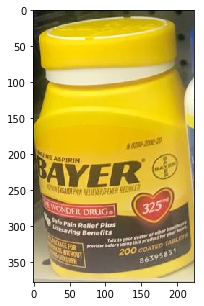

[INFO] bottle: 93.06%
['Alleve', 'Bayer_Aspirin', 'Cystex', 'Wallgreen_Aspirin_325', 'Wallgreen_Aspirin_81']
[0.45112781954887216, 0.6950354609929078, 0.86, 0.7164179104477612, 0.7288135593220338]
[-1.10917265 -0.37458347  1.84099286 -0.47556912  0.11833238]
[-0.6580448279269138, 0.3204519893482163, 2.7009928618902226, 0.24084878713671076, 0.84714593986334]
Cystex


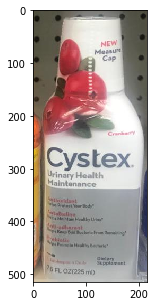

[INFO] bottle: 43.88%
['Alleve', 'Bayer_Aspirin', 'Cystex', 'Wallgreen_Aspirin_325', 'Wallgreen_Aspirin_81']
[0.7164179104477612, 0.6666666666666666, 0.44537815126050423, 0.6111111111111112, 0.5862068965517241]
[ 1.45886294  0.58593284  0.15854092 -0.90683493 -1.29650176]
[2.1752808492111866, 1.252599506556265, 0.6039190663732562, -0.29572382201875635, -0.7102948640841845]
Alleve


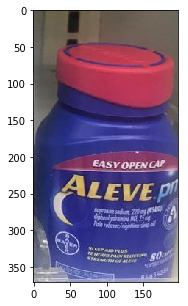

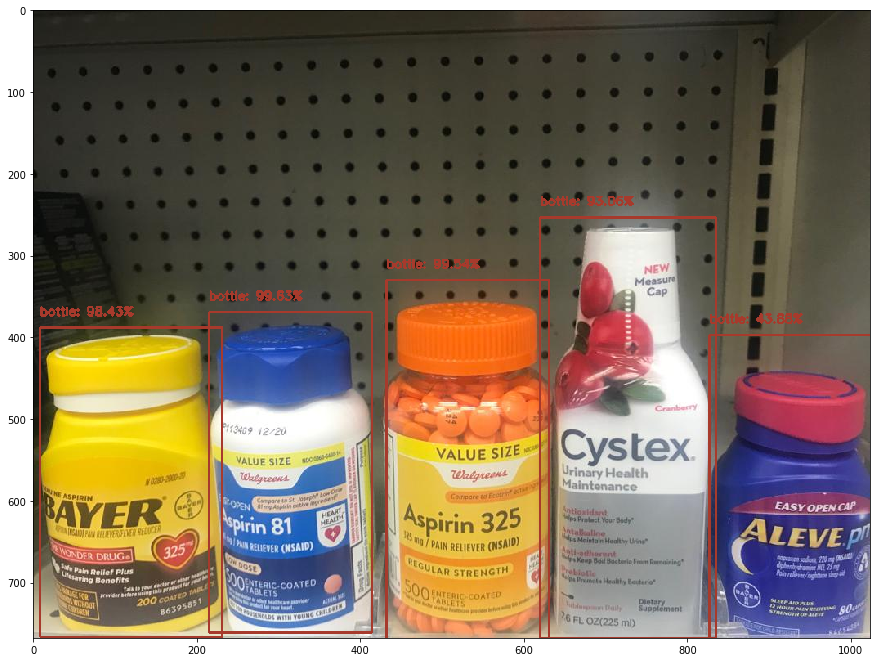

In [235]:
# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
prototxt = "MobileNetSSD_deploy.prototxt.txt"
model = "MobileNetSSD_deploy.caffemodel"
test = ".\images\Bottles2.jpeg"
threshold = 0.2

CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", \
           "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep",\
           "sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model)

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
# (note: normalization is done via the authors of the MobileNet SSD
# implementation)
image = cv2.imread(test)
clone = image.copy()
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

# loop over the detections
for i in np.arange(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > threshold:
    # extract the index of the class label from the `detections`,
    # then compute the (x, y)-coordinates of the bounding box for
    # the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # display the prediction
        label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
        print("[INFO] {}".format(label))
        cv2.rectangle(image, (startX, startY), (endX, endY),COLORS[idx], 2)
        if startY - 15 > 15:
            y = startY - 15  
        else:
            y = startY + 15
        cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
        
        # identify query
        crop_img = clone[startY:endY, startX:endX]
        label = matching(crop_img, database)
        print(label)
#         kp, des = orb.detectAndCompute(crop_img,None)
#         hist = cv2.calcHist([crop_img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
#         score = []
#         for label in desc:
#             hist_base = label[0]
#             des_base = label[1]
#             score.append(score_match(des,hist, des_base, hist_base))

#         print(labels[score.index(max(score))])
        plt.figure(figsize=(5,5))
        crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
        plt.imshow(crop_img)
        plt.show()

# show the output image
plt.figure(figsize=(15,15))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [147]:
# https://pysource.com/2018/07/20/detect-how-similar-two-images-are-with-opencv-and-python/
# https://gist.github.com/duhaime/211365edaddf7ff89c0a36d9f3f7956c
def score_match(desc_1, hist1, desc_2, hist2):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(desc_1, desc_2)
    similar_regions = [i for i in matches if i.distance < 70]
    if len(matches) == 0:
        score1 = 0
    score1 = len(similar_regions) / len(matches)
    score2 = np.linalg.norm(hist1-hist2) 
    print(score1, score2)
    return score1 - score2

In [ ]:
# Ensure that Classes[idx] in Allowed Set
# Extract data from there?